In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置绘图风格和中文显示
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 11

# 定义配色方案
colors = {'setosa': '#FF6B6B', 'versicolor': '#4ECDC4', 'virginica': '#45B7D1'}

In [2]:
# Load local CSV file
df = pd.read_csv('IrisDataset/IrisDataset/iris.csv')

# 简化物种名称（去掉'Iris-'前缀）
df['Species'] = df['Species'].str.replace('Iris-', '')

# 查看数据基本信息
print("数据集形状:", df.shape)
print("\n数据集前5行:")
df.head()

数据集形状: (150, 6)

数据集前5行:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


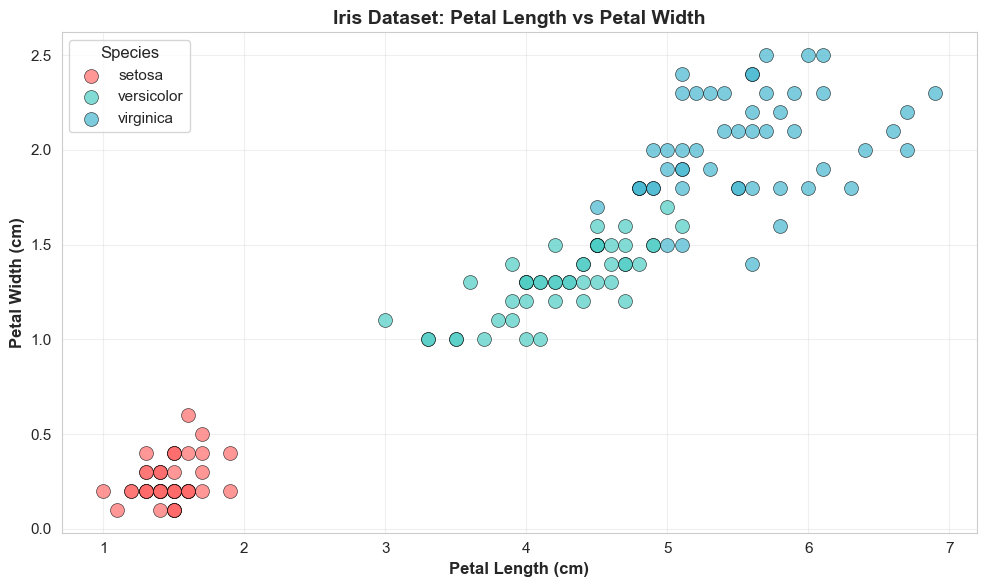

✅ 散点图已保存为: iris_scatter.png


In [3]:
plt.figure(figsize=(10, 6))

# 为每个物种绘制散点
for species in df['Species'].unique():
    data = df[df['Species'] == species]
    plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], 
                label=species, color=colors[species], 
                alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

plt.xlabel('Petal Length (cm)', fontsize=12, fontweight='bold')
plt.ylabel('Petal Width (cm)', fontsize=12, fontweight='bold')
plt.title('Iris Dataset: Petal Length vs Petal Width', fontsize=14, fontweight='bold')
plt.legend(title='Species', title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 保存图片
plt.savefig('Img/iris_scatter.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ 散点图已保存为: iris_scatter.png")

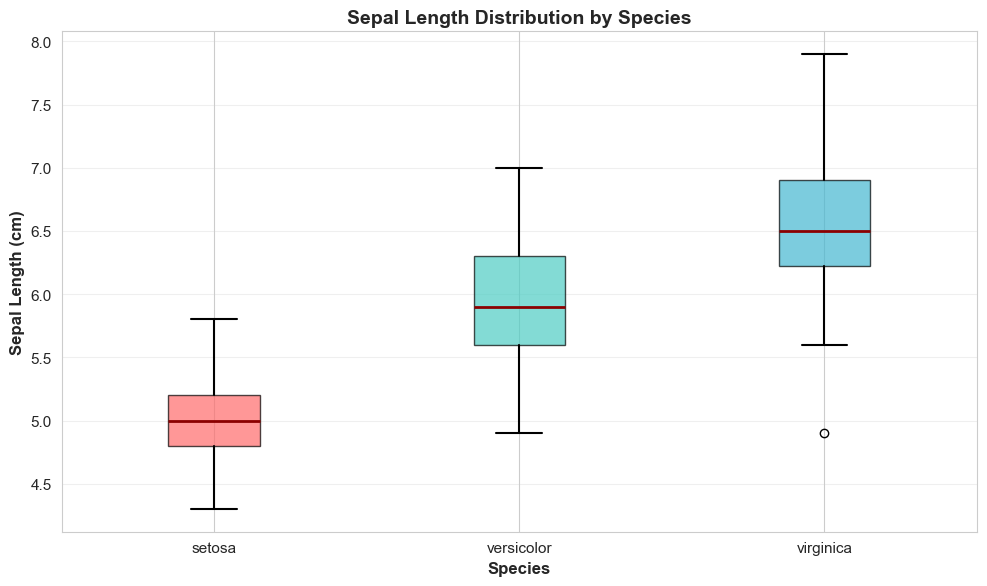

✅ 箱线图已保存为: iris_boxplot.png


In [4]:
plt.figure(figsize=(10, 6))

# 准备数据
box_data = [df[df['Species'] == species]['SepalLengthCm'].values 
            for species in df['Species'].unique()]

# 创建箱线图
bp = plt.boxplot(box_data, labels=df['Species'].unique(), patch_artist=True)

# 设置颜色
for patch, color in zip(bp['boxes'], colors.values()):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# 美化箱线图的其他元素
for whisker in bp['whiskers']:
    whisker.set(linewidth=1.5)
for cap in bp['caps']:
    cap.set(linewidth=1.5)
for median in bp['medians']:
    median.set(linewidth=2, color='darkred')

plt.xlabel('Species', fontsize=12, fontweight='bold')
plt.ylabel('Sepal Length (cm)', fontsize=12, fontweight='bold')
plt.title('Sepal Length Distribution by Species', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# 保存图片
plt.savefig('Img/iris_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ 箱线图已保存为: iris_boxplot.png")

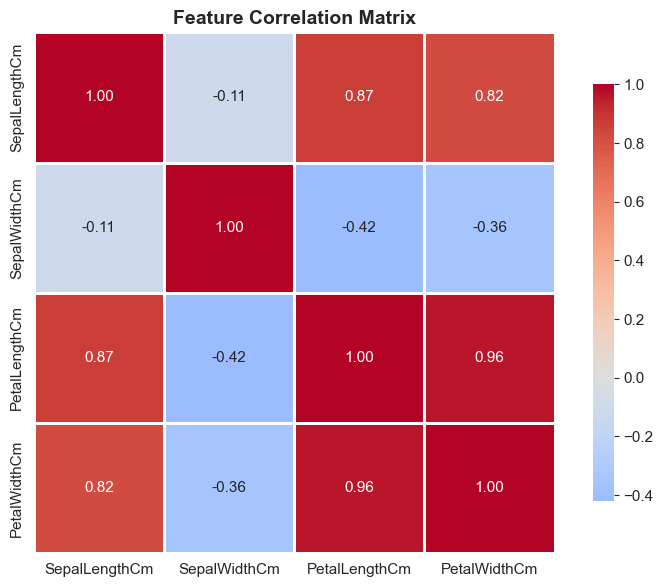

✅ 热力图已保存为: iris_heatmap.png


In [5]:
# 选择数值型列计算相关性
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
corr_matrix = df[numeric_cols].corr()

# 创建热力图
sns.heatmap(corr_matrix, 
            annot=True,           # 显示数值
            fmt='.2f',           # 数值格式
            cmap='coolwarm',     # 颜色映射
            center=0,            # 颜色中心值
            square=True,         # 正方形格子
            linewidths=1,        # 格子间线宽
            cbar_kws={"shrink": 0.8})  # 颜色条大小

plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()

# 保存图片
plt.savefig('img/iris_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ 热力图已保存为: iris_heatmap.png")

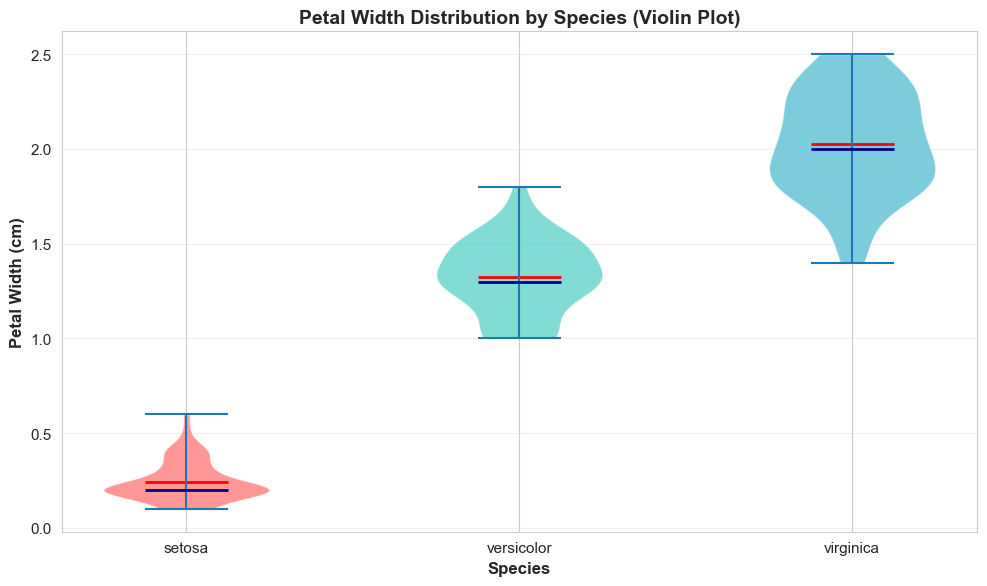

✅ 小提琴图已保存为: iris_violin.png


In [6]:
plt.figure(figsize=(10, 6))

# 准备数据
violin_data = [df[df['Species'] == species]['PetalWidthCm'].values 
               for species in df['Species'].unique()]

# 创建小提琴图
parts = plt.violinplot(violin_data,
                       positions=[0, 1, 2],
                       showmeans=True,      # 显示均值
                       showmedians=True,    # 显示中位数
                       showextrema=True)    # 显示极值

# 设置颜色
for pc, color in zip(parts['bodies'], colors.values()):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

# 设置其他元素样式
parts['cmeans'].set_color('red')
parts['cmeans'].set_linewidth(2)
parts['cmedians'].set_color('darkblue')
parts['cmedians'].set_linewidth(2)

plt.xticks([0, 1, 2], df['Species'].unique())
plt.xlabel('Species', fontsize=12, fontweight='bold')
plt.ylabel('Petal Width (cm)', fontsize=12, fontweight='bold')
plt.title('Petal Width Distribution by Species (Violin Plot)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# 保存图片
plt.savefig('Img/iris_violin.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ 小提琴图已保存为: iris_violin.png")